In [40]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import scipy.stats

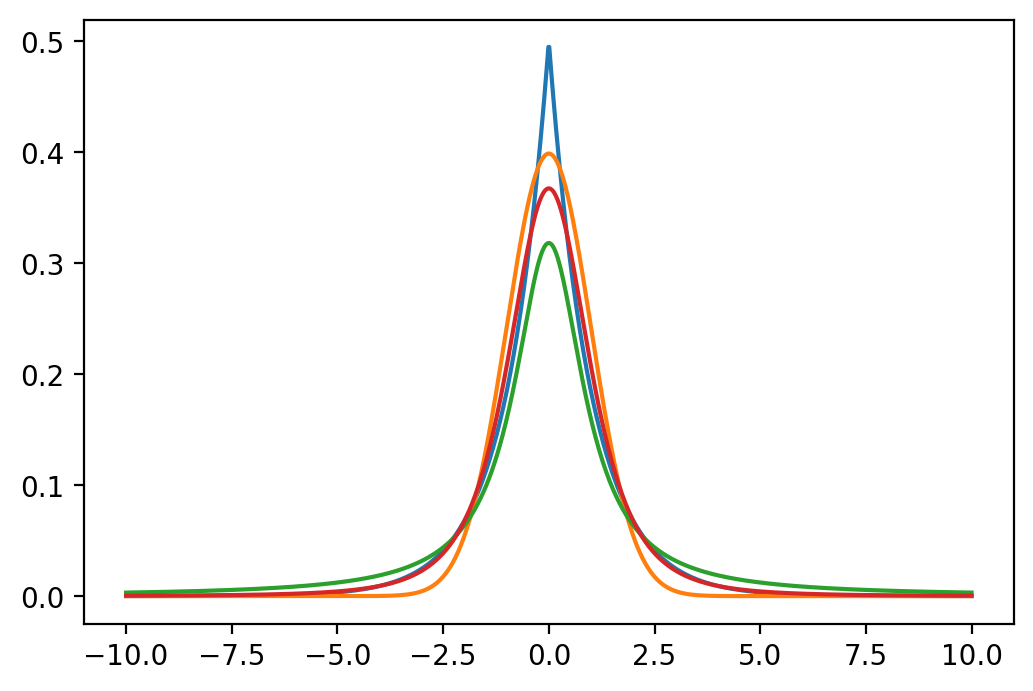

In [2]:
x = np.linspace(-10, 10, 1000)
y1 = scipy.stats.laplace(0).pdf(x)
y2 = scipy.stats.norm(0).pdf(x)
y3 = scipy.stats.cauchy(0).pdf(x)
y4 = scipy.stats.t.pdf(x, 3)
plt.figure(dpi=200)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)

In [38]:
total_points = 100000
group_array_length = 2
normal_random_array = np.random.normal(0, 2, total_points)
random_array_groups = normal_random_array.reshape(total_points // group_array_length, group_array_length)
print("Mean of sqrt of sigmas: ", np.mean(np.sqrt(np.var(random_array_groups, axis=1))))
print("Sqrt of mean of sigmas: ", np.sqrt(np.mean(np.var(random_array_groups, axis=1))))
print("Std of sigmas: ", np.std(np.var(random_array_groups, axis=1)))
print("Adjusted Mean of sqrt of sigmas: ", np.mean(np.sqrt(np.var(random_array_groups, axis=1, ddof=1))))
print("Adjusted Sqrt of mean of sigmas: ", np.sqrt(np.mean(np.var(random_array_groups, axis=1, ddof=1))))
print("Adjusted Std of sigmas: ", np.std(np.var(random_array_groups, axis=1, ddof=1)))
print("Total sigma: ", np.sqrt(np.var(normal_random_array)))

Mean of sqrt of sigmas:  1.1262957369191888
Sqrt of mean of sigmas:  1.412140762074556
Std of sigmas:  2.833382329827276
Adjusted Mean of sqrt of sigmas:  1.592822706394116
Adjusted Sqrt of mean of sigmas:  1.997068617705715
Adjusted Std of sigmas:  5.666764659654552
Total sigma:  1.9973048082097948


In [81]:
total_points = 100
exponential_random_array = np.random.exponential(1, total_points)
normal_random_array = np.exp(np.random.normal(0, 2, total_points))
print("Anderson test for wrong exponential distribution: ", scipy.stats.anderson(normal_random_array, dist='expon'))
print("Anderson test for exponential distribution: ", scipy.stats.anderson(exponential_random_array, dist='expon'))


Anderson test for wrong exponential distribution:  AndersonResult(statistic=34.989787129936985, critical_values=array([0.917, 1.072, 1.333, 1.596, 1.945]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Anderson test for exponential distribution:  AndersonResult(statistic=0.7361833655019581, critical_values=array([0.917, 1.072, 1.333, 1.596, 1.945]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [84]:
total_points = 100000
group_array_length = 100
exponential_random_array = np.random.exponential(3, total_points)
random_array_groups = exponential_random_array.reshape(total_points // group_array_length, group_array_length)
group_test_results = np.zeros((random_array_groups.shape[0], 5))
for i in range(random_array_groups.shape[0]):
    result = scipy.stats.anderson(random_array_groups[i], dist='expon')
    group_test_results[i] = result.statistic > result.critical_values
print("Percentage of groups that are not exponential: ", np.mean(group_test_results, axis=0))

Percentage of groups that are not exponential:  [0.154 0.107 0.051 0.03  0.015]


In [79]:
total_points = 100
exponential_random_array = np.random.exponential(3, total_points)
print("fit for exponential distribution with MLE: ", scipy.stats.expon.fit(exponential_random_array, method='MLE', floc=0))
print("fit for exponential distribution with MM: ", scipy.stats.expon.fit(exponential_random_array, method='MM', floc=0))

fit for exponential distribution with MLE:  (0.0, 3.152636519731048)
fit for exponential distribution with MM:  (0, 3.1526367187500046)


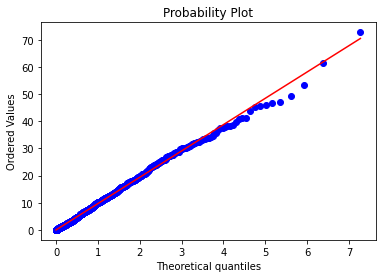

In [98]:
total_points = 1000
exponential_random_array = np.random.exponential(10, total_points)
scipy.stats.probplot(exponential_random_array, dist='expon', plot=plt);

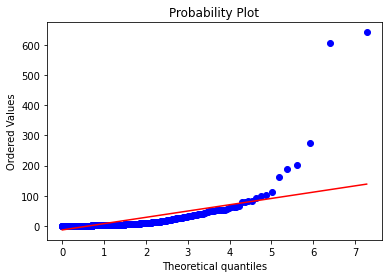

In [94]:
total_points = 1000
normal_random_array = np.exp(np.random.normal(0, 2, total_points))
scipy.stats.probplot(normal_random_array, dist='expon', plot=plt);

In [126]:
total_points = 100
exponential_random_array = np.random.exponential(1, total_points)
normal_random_array = np.exp(np.random.normal(0, 2, total_points))
print("Kolmogorov test for wrong exponential distribution: ", scipy.stats.kstest(normal_random_array, 'expon'))
print("Kolmogorov test for exponential distribution: ", scipy.stats.kstest(exponential_random_array, 'expon'))


Kolmogorov test for wrong exponential distribution:  KstestResult(statistic=0.26508422537317233, pvalue=1.0819014961332454e-06)
Kolmogorov test for exponential distribution:  KstestResult(statistic=0.07802717675731996, pvalue=0.5501590000394505)


In [131]:
total_points = 100000
group_array_length = 100
exponential_random_array = np.random.exponential(1, total_points)
random_array_groups = exponential_random_array.reshape(total_points // group_array_length, group_array_length)
group_test_results = np.zeros(random_array_groups.shape[0],)
for i in range(random_array_groups.shape[0]):
    result = scipy.stats.kstest(random_array_groups[i], 'expon')
    group_test_results[i] = result.pvalue < 0.03
print("Percentage of groups that are not exponential: ", np.mean(group_test_results, axis=0))

Percentage of groups that are not exponential:  0.025
